In [ ]:
#Mounting google and authenticating
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls /mydrive

Mounted at /content/gdrive


In [ ]:
!cp /mydrive/music\ project/X_spec_half.pickle ./
!cp /mydrive/music\ project/y_spec_half.pickle ./

In [ ]:
#LOADING DATA
import pickle 
pickle_off = open("X_spec_half.pickle", 'rb')
X_spec = pickle.load(pickle_off)

pickle_off = open("y_spec_half.pickle", 'rb')
y_spec = pickle.load(pickle_off)

In [ ]:
#RESHAPING
X_spec_ = X_spec.reshape(48, 440, 128, 1)
y_spec_ = y_spec.reshape(48, 440, 128, 1)

In [ ]:
#SPLITTING TO TRAIN AND TEST
print(X_spec_.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_spec_, y_spec_, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape)

(48, 440, 128, 1)
(43, 440, 128, 1) (5, 440, 128, 1)


In [ ]:
#for regression
X_val_reshape = X_val.reshape(-1,1)
y_val_reshape = y_val.reshape(-1,1)

X_val_reshape = X_val_reshape.reshape(1, len(X_val_reshape),1)
y_val_reshape = y_val_reshape.reshape(1, len(y_val_reshape),1)

In [ ]:
#Using Random Forest
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_spec_, y_spec_)

#print(regr.predict([[0, 0, 0, 0]]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
#R square
regr.score(X_spec_, y_spec_)

0.3967978758216605

In [ ]:
#Using regressor sequential
from tensorflow import keras
from tensorflow.keras import layers

horsepower_normalizer = preprocessing.Normalization(input_shape=[1,])
horsepower_normalizer.adapt(X_spec_
                            )

horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

In [ ]:
import tensorflow as tf
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error', metrics=[tf.keras.metrics.MeanSquaredError()])

history = horsepower_model.fit(
    X_spec_, y_spec_,
    epochs=5,
    # suppress logging
    #verbose=0,
    # Calculate validation results on 10% of the training data
    validation_split = 0.1)

Epoch 1/5
76032/76032 [==============================] - 117s 2ms/step - loss: 10.2469 - mean_squared_error: 186.6453 - val_loss: 8.7888 - val_mean_squared_error: 126.8809
Epoch 2/5
76032/76032 [==============================] - 116s 2ms/step - loss: 9.7955 - mean_squared_error: 165.4883 - val_loss: 8.7916 - val_mean_squared_error: 126.2527
Epoch 3/5
76032/76032 [==============================] - 117s 2ms/step - loss: 9.7876 - mean_squared_error: 165.1230 - val_loss: 8.8311 - val_mean_squared_error: 127.3049
Epoch 4/5
76032/76032 [==============================] - 117s 2ms/step - loss: 9.8009 - mean_squared_error: 165.6078 - val_loss: 8.7863 - val_mean_squared_error: 126.4755
Epoch 5/5
76032/76032 [==============================] - 117s 2ms/step - loss: 9.7931 - mean_squared_error: 165.4911 - val_loss: 8.7642 - val_mean_squared_error: 125.6438


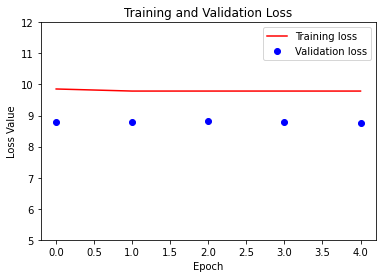

In [ ]:
import matplotlib.pyplot as plt

Epochs = 5
train_loss = history.history['loss']
train_accuracy = history.history['val_loss']

epochs = range(Epochs)

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, train_accuracy, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([5, 12])
plt.legend()
plt.show()

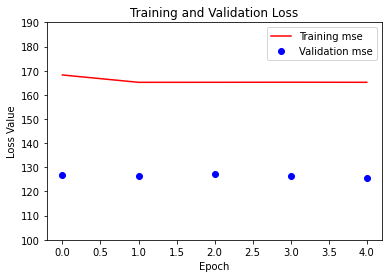

In [ ]:
import matplotlib.pyplot as plt

Epochs = 5
train_loss = history.history['mean_squared_error']
train_accuracy = history.history['val_mean_squared_error']

epochs = range(Epochs)

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training mse')
plt.plot(epochs, train_accuracy, 'bo', label='Validation mse')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([100, 190])
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
#from tensorflow.keras.layers import Lambda, RepeatVector, Reshape
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, GlobalMaxPool2D
from tensorflow.keras.layers import Concatenate 
from tensorflow.keras.optimizers import Adam

In [ ]:
#AUTOENCODING
from tensorflow import keras
from tensorflow.keras import layers



encoder_input = keras.Input(shape=(440, 128, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = tf.keras.layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D((54,15))(x)
x = layers.Conv2DTranspose(32, 5, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 5)(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(440, 128, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 440, 128, 1)]     0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 438, 126, 16)      160       
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 436, 124, 32)      4640      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 145, 41, 32)       0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 143, 39, 32)       9248      
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 141, 37, 16)       4624      
_________________________________________________________________
global_max_pooling2d_16 (Glo (None, 16)                0   

In [ ]:
autoencoder.compile(optimizer=Adam(), loss="mse", metrics=[tf.keras.metrics.MeanSquaredError()])

In [ ]:
history = autoencoder.fit(X_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
2/2 [==============================] - 0s 138ms/step - loss: 158.6112 - mean_squared_error: 158.6112 - val_loss: 113.9731 - val_mean_squared_error: 113.9731
Epoch 2/50
2/2 [==============================] - 0s 73ms/step - loss: 148.0618 - mean_squared_error: 148.0618 - val_loss: 114.2196 - val_mean_squared_error: 114.2196
Epoch 3/50
2/2 [==============================] - 0s 80ms/step - loss: 140.7964 - mean_squared_error: 140.7964 - val_loss: 141.5448 - val_mean_squared_error: 141.5448
Epoch 4/50
2/2 [==============================] - 0s 71ms/step - loss: 163.2144 - mean_squared_error: 163.2144 - val_loss: 144.7345 - val_mean_squared_error: 144.7345
Epoch 5/50
2/2 [==============================] - 0s 74ms/step - loss: 162.1255 - mean_squared_error: 162.1255 - val_loss: 109.7072 - val_mean_squared_error: 109.7072
Epoch 6/50
2/2 [==============================] - 0s 72ms/step - loss: 141.9182 - mean_squared_error: 141.9182 - val_loss: 120.6839 - val_mean_squared_error: 120.68

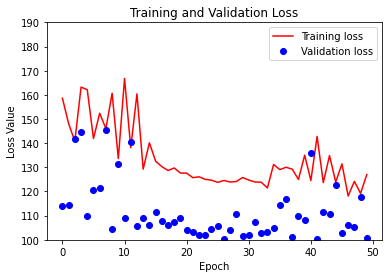

In [ ]:
#SHOWING RESULTS OF AUTOENCODING
import matplotlib.pyplot as plt

Epochs = 50
train_loss = history.history['loss']
train_accuracy = history.history['val_loss']

epochs = range(Epochs)

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, train_accuracy, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([100, 190])
plt.legend()
plt.show()

In [ ]:
pred_mask = autoencoder.predict(X_test)

In [ ]:
pred_mask = pred_mask.reshape(5,440,128)
X_test = X_test.reshape(5,440,128)

In [ ]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import librosa
import librosa.display

fig = plt.Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
p = librosa.display.specshow(X_test[0], ax=ax, y_axis='mel', fmax=8000, x_axis='time')
fig.savefig('spec1.png')

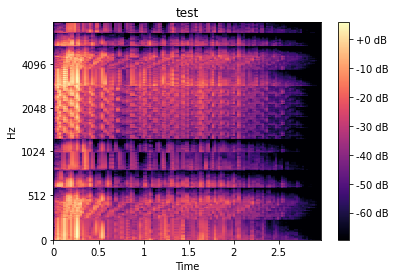

In [ ]:
librosa.display.specshow(X_test[0], y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('test')
plt.show()

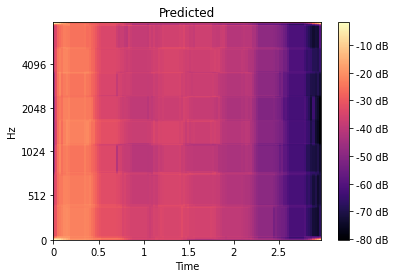

In [ ]:
librosa.display.specshow(pred_mask[0], y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Predicted')
plt.show()

In [ ]:
print(len(np.unique(X_test[0])))
print(len(np.unique(pred_mask[0])))

50640
9653


In [ ]:
#AUTOENCODING
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



encoder_input = keras.Input(shape=(440, 128, 1), name="original_img")
x = layers.Conv2D(256, 3, activation="relu")(encoder_input)
x = tf.keras.layers.Conv2D(256, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(256, 3, activation="relu")(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(64,), name="encoded_img")
x = layers.Reshape((16, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(256, 3, activation="relu")(x)
x = layers.Conv2DTranspose(256, 3, activation="relu")(x)
x = layers.UpSampling2D((22, 16))(x)
x = layers.Conv2DTranspose(256, 3, padding='same' ,activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, padding='same')(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(440, 128, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 440, 128, 1)]     0         
_________________________________________________________________
conv2d_213 (Conv2D)          (None, 438, 126, 256)     2560      
_________________________________________________________________
conv2d_214 (Conv2D)          (None, 436, 124, 256)     590080    
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 145, 41, 256)      0         
_________________________________________________________________
conv2d_215 (Conv2D)          (None, 143, 39, 256)      590080    
_________________________________________________________________
conv2d_216 (Conv2D)          (None, 141, 37, 64)       147520    
_________________________________________________________________
global_max_pooling2d_53 (Glo (None, 64)                0   

In [ ]:
autoencoder.compile(optimizer=Adam(), loss="mse", metrics=[tf.keras.metrics.MeanSquaredError()])


In [ ]:
history = autoencoder.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
2/2 [==============================] - 3s 587ms/step - loss: 115.7585 - mean_squared_error: 115.7585 - val_loss: 137.7803 - val_mean_squared_error: 137.7803
Epoch 2/50
2/2 [==============================] - 3s 556ms/step - loss: 114.4720 - mean_squared_error: 114.4720 - val_loss: 130.8078 - val_mean_squared_error: 130.8078
Epoch 3/50
2/2 [==============================] - 3s 559ms/step - loss: 110.6226 - mean_squared_error: 110.6226 - val_loss: 124.0924 - val_mean_squared_error: 124.0924
Epoch 4/50
2/2 [==============================] - 3s 565ms/step - loss: 116.4668 - mean_squared_error: 116.4668 - val_loss: 118.9035 - val_mean_squared_error: 118.9035
Epoch 5/50
2/2 [==============================] - 3s 558ms/step - loss: 107.1085 - mean_squared_error: 107.1085 - val_loss: 136.1195 - val_mean_squared_error: 136.1195
Epoch 6/50
2/2 [==============================] - 3s 564ms/step - loss: 117.4301 - mean_squared_error: 117.4301 - val_loss: 123.6539 - val_mean_squared_error: 1

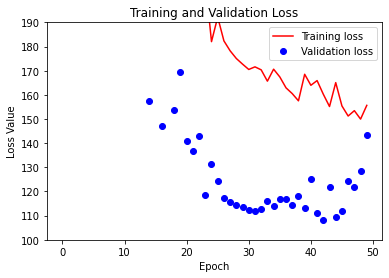

In [ ]:
#SHOWING RESULTS OF AUTOENCODING Fist part
import matplotlib.pyplot as plt

Epochs = 50
train_loss = history.history['loss']
train_accuracy = history.history['val_loss']

epochs = range(Epochs)

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, train_accuracy, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([100, 190])
plt.legend()
plt.show()

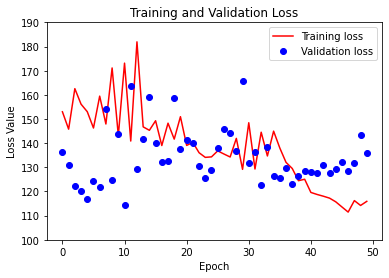

In [ ]:
#SHOWING RESULTS OF AUTOENCODING Fist part
import matplotlib.pyplot as plt

Epochs = 50
train_loss = history.history['loss']
train_accuracy = history.history['val_loss']

epochs = range(Epochs)

plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, train_accuracy, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([100, 190])
plt.legend()
plt.show()

In [ ]:
pred_mask = autoencoder.predict(X_test)

In [ ]:
pred_mask = pred_mask.reshape(5,440,128)
y_test = y_test.reshape(5,440,128)

Text(0.5, 1.0, 'Predicted')

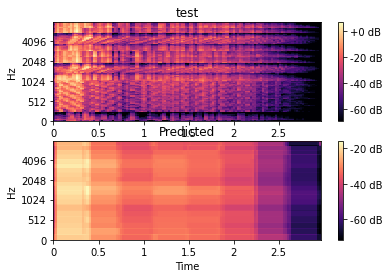

In [ ]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

fig, ax = plt.subplots(2)
a = librosa.display.specshow(y_test[0], y_axis='mel', fmax=8000, x_axis='time', ax=ax[0])
fig.colorbar(a, format='%+2.0f dB', ax=ax[0])
ax[0].set_title('test')
#ax[0].show()

b = librosa.display.specshow(pred_mask[0], y_axis='mel', fmax=8000, x_axis='time', ax=ax[1])
fig.colorbar(b, format='%+2.0f dB', ax=ax[1])
ax[1].set_title('Predicted')
#ax[1].show()

In [ ]:
import scipy
from scipy.io.wavfile import write
import numpy as np


sr=22050

#First Approach audio conversion
audio_path = '/content/audio/test.wav'
wav = librosa.db_to_power(y_test[0], ref=1.0)
wav = librosa.feature.inverse.mel_to_audio (M=wav, hop_length=512, sr=sr)
#wav *= 32767 / max (0.01, np.max(np.abs(wav)))
#scipy.io.wavfile.write (audio_path, 16000, wav.astype(np.int16))
write (audio_path, sr, wav.astype(np.float32))

In [ ]:
sr=22050

#First Approach audio conversion
audio_path = '/content/audio/predicted.wav'
wav = librosa.db_to_power(pred_mask[0], ref=1.0)
wav = librosa.feature.inverse.mel_to_audio (M=wav, hop_length=512, sr=sr)
#wav *= 32767 / max (0.01, np.max(np.abs(wav)))
#scipy.io.wavfile.write (audio_path, 16000, wav.astype(np.int16))
write (audio_path, sr, wav.astype(np.float32))

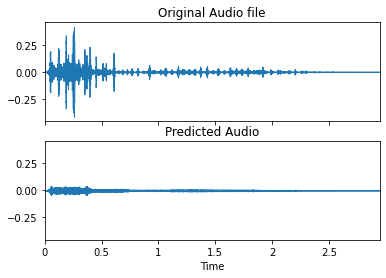

In [ ]:
import matplotlib.pyplot as plt
y, sr = librosa.load('/content/audio/test.wav')
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.waveplot(y, sr=sr, ax=ax[0])
ax[0].set(title='Original Audio file')
ax[0].label_outer()

y, sr = librosa.load('/content/audio/predicted.wav')
librosa.display.waveplot(y, sr=sr, ax=ax[1])
ax[1].set(title='Predicted Audio')
ax[1].label_outer()

In [1]:
#will try different model